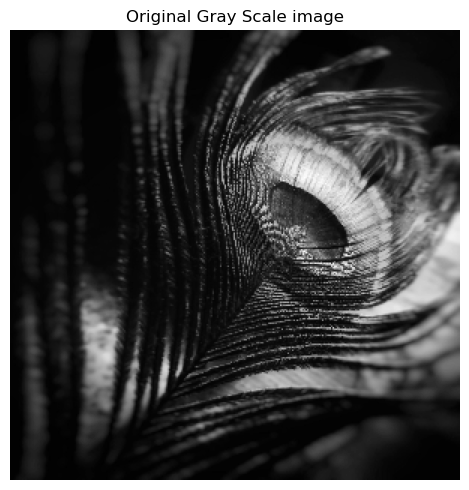

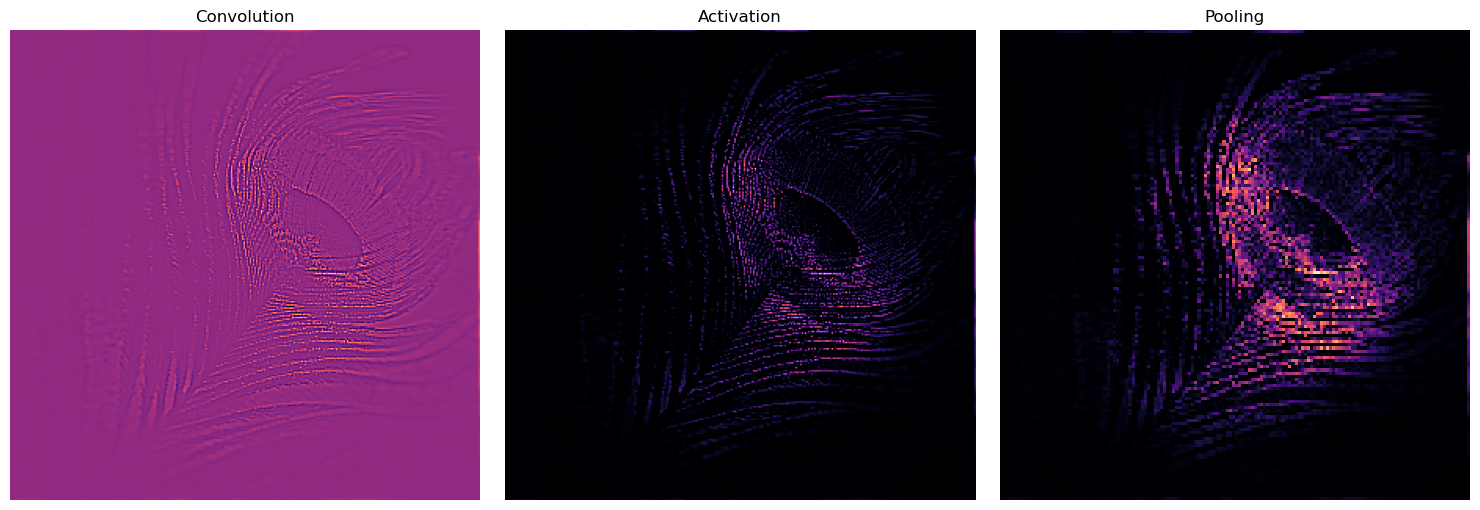

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set up figure settings for better visualization
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the convolution kernel
kernel = tf.constant([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])

# Load and preprocess the image
image = tf.io.read_file(r'MainImage.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# Visualize the original grayscale image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()

# Prepare the image for convolution
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

# Reshape and cast the kernel
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Perform convolution
conv_fn = tf.nn.conv2d
image_filter = conv_fn(input=image,
                       filters=kernel,
                       strides=1, # or (1, 1)
                       padding='SAME')

# Visualize the convolved image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Apply ReLU activation
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

# Visualize the activated image
plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Apply max pooling
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape=(2, 2),
                      pooling_type='MAX',
                      strides=(2, 2),
                      padding='SAME')

# Visualize the pooled image
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()